**Vedant Modak**
  | BE(IT) undergrad @ PES Modern College of Engineering,Pune

**Calculating Efficient Frontier of a Portfolio**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv('F:\Data Analytics\Portfolio\Projects\Project - 6 (Stock Market Analysis)\HDFC.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [4]:
df.set_index('Date')

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327


In [8]:
df.rename(columns={"VWAP": "HDFCVWAP"}, inplace=True)

In [9]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,HDFCVWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [5]:
df1=pd.read_csv('F:\Data Analytics\Portfolio\Projects\Project - 6 (Stock Market Analysis)\ICICIBANK.csv')

In [6]:
df1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


In [7]:
df1.set_index('Date')

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ICICIBANK,EQ,569.95,602.00,605.50,588.00,588.70,591.10,596.22,62584522,3.731429e+15,546696.0,16913351.0,0.2702
2021-04-27,ICICIBANK,EQ,591.10,593.25,601.95,591.10,599.00,598.75,597.63,24239685,1.448630e+15,233412.0,9056247.0,0.3736
2021-04-28,ICICIBANK,EQ,598.75,598.00,622.80,598.00,619.70,621.35,612.57,33292864,2.039422e+15,295406.0,14011476.0,0.4209


In [10]:
df1.rename(columns={"VWAP": "ICICIVWAP"}, inplace=True)

In [11]:
df1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,ICICIVWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


In [14]:
df2=pd.concat([df['HDFCVWAP'], df1['ICICIVWAP']], axis=1, keys=['HDFC', 'ICICI'])

In [15]:
df2.head()

,HDFC,ICICI
0,293.50,73.20
1,303.62,73.38
2,294.53,70.85
3,300.14,72.04
4,288.80,68.72


<AxesSubplot:>

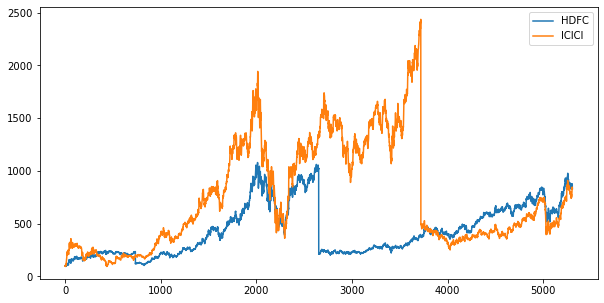

In [16]:
(df2/df2.iloc[0]*100).plot(figsize=(10,5))

In [17]:
log_returns=np.log(df2/df2.shift(1))

In [18]:
log_returns.mean()*250

HDFC     0.099920
ICICI    0.099687
dtype: float64

In [19]:
log_returns.cov()*250

,HDFC,ICICI
HDFC,0.239630,0.058085
ICICI,0.058085,0.279742


In [20]:
log_returns.corr()

,HDFC,ICICI
HDFC,1.000000,0.224342
ICICI,0.224342,1.000000


**Lets Consider a portfolio having these 2 securities with random weights**

In [21]:
arr=np.random.random(2)
arr

array([0.07266976, 0.60659837])

In [22]:
arr[0]+arr[1]

0.6792681342282156

**Considering 100% allocation of funds**

In [23]:
weights=np.random.random(2)
weights /=np.sum(weights)
weights

array([0.82369302, 0.17630698])

In [24]:
weights[0]+weights[1]

1.0

**Expected Portfolio Return**

In [25]:
np.sum(weights*log_returns.mean())*250

0.09987917268230848

**Expected Portfolio Variance**

In [26]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.1881479232955541

**Expected Portfolio Volatality**

In [27]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.43376021405328785

**Lets Check 1000 possible combinations of the assets for this porfolio**

In [29]:
pfolio_returns=[]
pfolio_volatality=[]

for x in range(1000):
    weights=np.random.random(2)
    weights /=np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatality.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns, pfolio_volatality

([0.09980341892852201,
  0.09974542806793035,
  0.09984292200288038,
  0.09977203131359202,
  0.09979162500344321,
  0.09978602264197552,
  0.09981255976095987,
  0.09980115281848131,
  0.09980634666311619,
  0.09989823988770892,
  0.0998762382914074,
  0.09986320170025591,
  0.099911576126266,
  0.09974162399124814,
  0.09978805778683754,
  0.09980727886657048,
  0.09982683734682027,
  0.09977827326868252,
  0.09981071417156394,
  0.0998291107717755,
  0.09981070873758591,
  0.09981143116852216,
  0.09991159727431564,
  0.09983538945186697,
  0.09984600038265057,
  0.09980438106341787,
  0.09977478473472126,
  0.09979734386818481,
  0.09970913465265988,
  0.09983369666229197,
  0.09980630506788,
  0.09988825445158601,
  0.09980031053481518,
  0.09984622747672535,
  0.09984804780642186,
  0.09982353386544408,
  0.09986826429155939,
  0.09981176162661255,
  0.09982841472183085,
  0.09978377649126928,
  0.09977118492895222,
  0.09974117981465963,
  0.0997838251478867,
  0.099831213487832

In [30]:
pfolio_returns=[]
pfolio_volatality=[]

for x in range(1000):
    weights=np.random.random(2)
    weights /=np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatality.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns=np.array(pfolio_returns)
pfolio_volatality=np.array(pfolio_volatality)

pfolio_returns, pfolio_volatality

(array([0.09983179, 0.09969898, 0.09988827, 0.09970009, 0.09972938,
        0.09981516, 0.09982589, 0.09976598, 0.09978829, 0.09987343,
        0.09980406, 0.09985574, 0.09977303, 0.09970813, 0.09970648,
        0.09982879, 0.09973243, 0.09978487, 0.09988674, 0.09982905,
        0.09975191, 0.09970358, 0.09984093, 0.09985239, 0.09982267,
        0.09980676, 0.09977098, 0.09978654, 0.09968884, 0.09973574,
        0.09981979, 0.09990588, 0.09979933, 0.09981564, 0.09988081,
        0.09986515, 0.09986719, 0.09985717, 0.09980671, 0.09985784,
        0.09969582, 0.09984848, 0.09989825, 0.09980188, 0.09978744,
        0.09981079, 0.09982978, 0.09977947, 0.09978266, 0.09974504,
        0.09983182, 0.09983077, 0.09984169, 0.09986799, 0.09978084,
        0.09975394, 0.09982924, 0.09989362, 0.0998825 , 0.09983377,
        0.09985834, 0.09978209, 0.09984649, 0.09972292, 0.09980535,
        0.09968768, 0.09976431, 0.09976709, 0.09986738, 0.09980388,
        0.09976964, 0.09975921, 0.09975749, 0.09

In [31]:
portfolios=pd.DataFrame({'Returns': pfolio_returns, 'Volatality': pfolio_volatality})

In [32]:
portfolios.head()

,Returns,Volatality
0,0.099832,0.399860
1,0.099699,0.508597
2,0.099888,0.444296
3,0.099700,0.506715
4,0.099729,0.461417


In [33]:
portfolios.tail()

,Returns,Volatality
995,0.099910,0.474363
996,0.099794,0.401708
997,0.099789,0.403678
998,0.099864,0.418512
999,0.099821,0.397682


Text(0, 0.5, 'Expected Return')

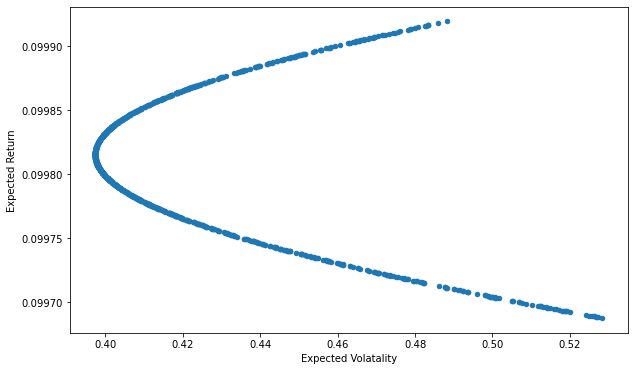

In [34]:
portfolios.plot(x='Volatality', y='Returns', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatality')
plt.ylabel('Expected Return')